<a href="https://colab.research.google.com/github/MilanSinghBisht/collab-works/blob/main/Simple_linear_regression_using_(tf_keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing  packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

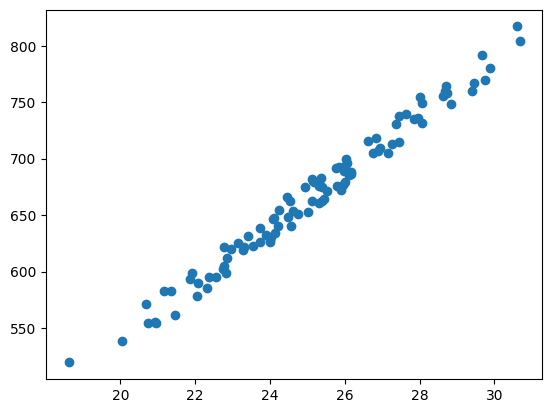

In [15]:
#generating a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price= 25 * area + 5+ np.random.randint(20,50,size = len(area))
data = np.array([area,price])
data = pd.DataFrame(data = data.T,columns =['area','price'])
plt.scatter(data['area'],data['price'])
plt.show()

In [16]:
data = (data -data.min()) / (data.max() - data.min()) # Normalize

In [17]:
model = K.Sequential([
    Dense(1,input_shape =[1,],activation = None)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='mean_squared_error',optimizer = 'sgd')


In [20]:
model.fit(x=data['area'],y=data['price'],epochs=100,batch_size = 32,
          verbose = 1,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1541 - val_loss: 0.1724
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1302 - val_loss: 0.1508
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1212 - val_loss: 0.1327
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0991 - val_loss: 0.1169
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0949 - val_loss: 0.1035
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0813 - val_loss: 0.0922
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0672 - val_loss: 0.0822
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0647 - val_loss: 0.0733
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0536 - val_loss: 0.0653
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0510 - val_loss: 0.0589
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0445 - val_loss: 0.0529
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0430 - val_lo

In [21]:
y_pred = model.predict(data['area'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


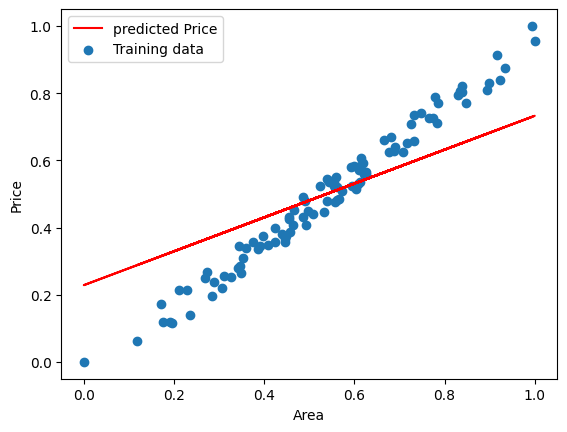

In [22]:
plt.plot(data['area'],y_pred,color= 'red',label = 'predicted Price')
plt.scatter(data['area'],data['price'],label = 'Training data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()


In [23]:
model.weights

[<Variable path=sequential_1/dense_1/kernel, shape=(1, 1), dtype=float32, value=[[0.5040254]]>,
 <Variable path=sequential_1/dense_1/bias, shape=(1,), dtype=float32, value=[0.22845392]>]